In [1]:
#For Dataset Handling
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.utils import resample

#For Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import itertools

#For model building
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#For Metrics evaluation 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#### Data Reading

In [2]:
df = pd.read_csv("archive/train.csv")

In [3]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


#### Basic EDA and Pre-Processing of Data for Modelling

In [4]:
# found 0 nan (missing) values
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [5]:
# dropping policy_id as it is just aprimary key, not of any use in our analysis or model training
df=df.drop('policy_id', axis=1)
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


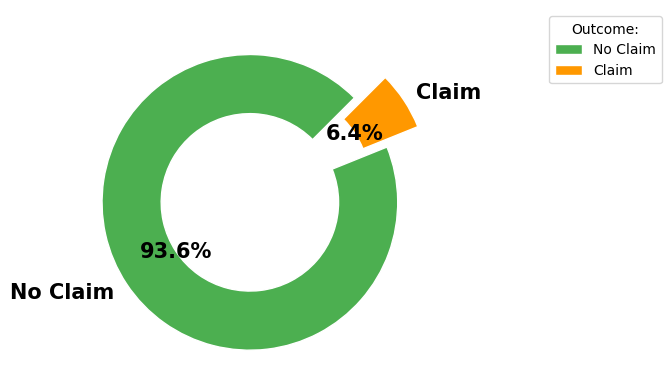

In [6]:
#plot pie chart to visualize distribution in out target variable

fig, ax = plt.subplots(facecolor='white')

labels = ['No Claim', 'Claim']
sizes = df['is_claim'].value_counts()
colors = ['#4CAF50', '#FF9800']  # Updated colors
explode = [0.1, 0.15]

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors,
       wedgeprops=dict(width=0.4, edgecolor='w'), explode=explode,
       textprops={'fontsize': 15, 'fontweight': 'bold'})

ax.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))

ax.set_facecolor('white')

plt.show()


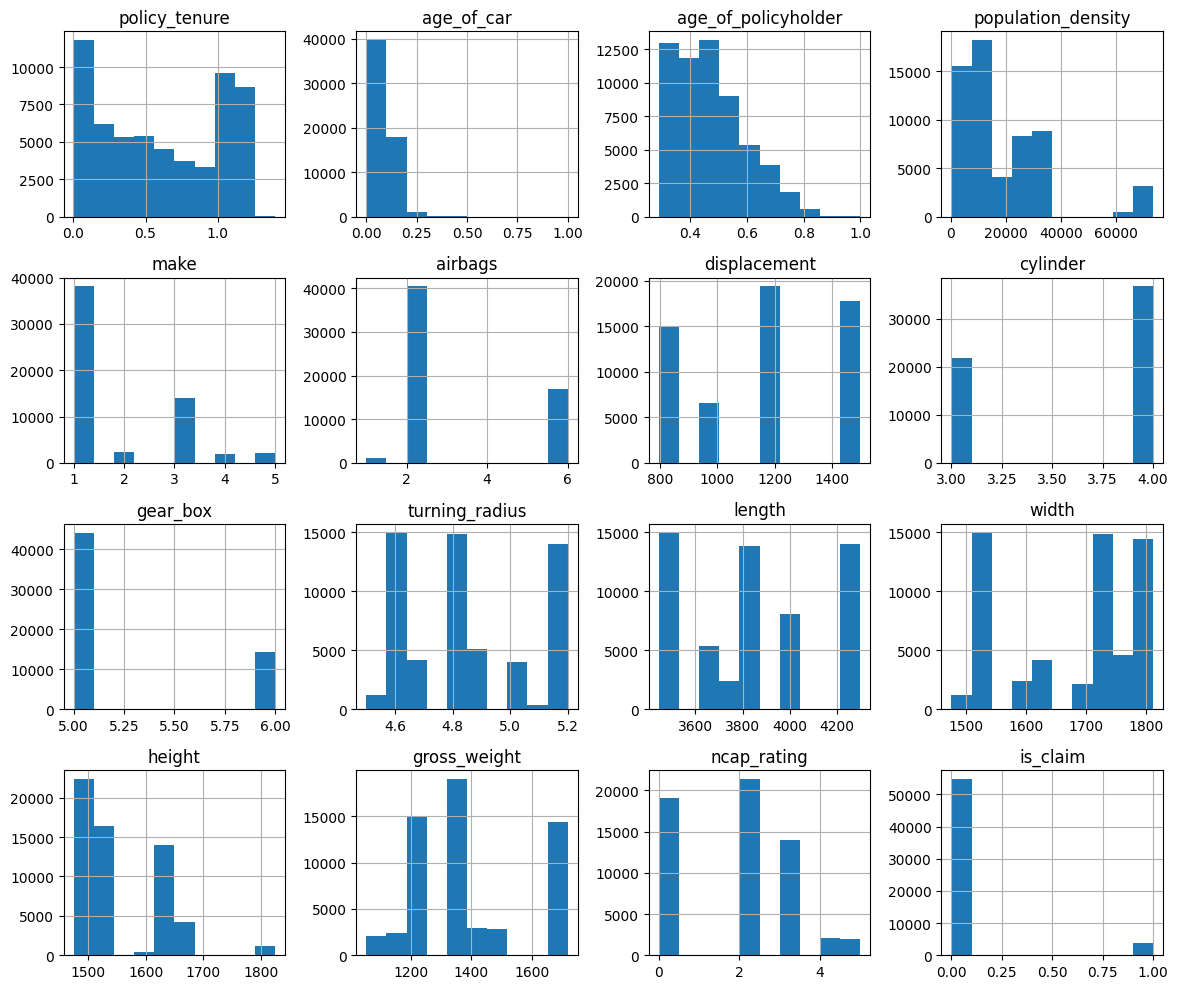

In [7]:
df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [8]:
# check max_torque count 
df['max_torque'].value_counts()

max_torque
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: count, dtype: int64

In [9]:
# separate torque and rpm from single string format column and combine them back again calculating the ratio
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']

# Deleting redundant columns from training set
df.drop('max_torque', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('torque',axis=1,inplace=True)

In [10]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_power,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,67.06bhp@5500rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,67.06bhp@5500rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,0.017143
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682


In [11]:
df['max_power'].value_counts()

max_power
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: count, dtype: int64

In [12]:
# separate power and rpm from single string format column and combine them back again calculating the ratio
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']

df.drop('power', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('max_power',axis=1,inplace=True)

In [13]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,K Series Dual jet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750


In [14]:
# printing list of binary columns (No/Yes)
is_cols=[col for col in df.columns if col.startswith("is") and col!="is_claim"]
print(is_cols)

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [15]:
# replacing No -> 0 and Yes - > 1
# df = df.replace({ "No" : 0 , "Yes" : 1 })

In [16]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,1.0 SCe,...,Yes,Yes,No,Yes,Yes,Yes,2,0,0.021412,0.012193
58588,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
58589,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,F8D Petrol Engine,...,No,Yes,No,No,No,Yes,0,0,0.017143,0.006727
58590,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,K Series Dual jet,...,Yes,Yes,Yes,Yes,Yes,Yes,2,0,0.025682,0.014750


In [17]:
# Printing all the numerical columns
dataset_num_col = df.select_dtypes(include=['int', 'float']).columns
print(" Data Set Numerical columns:")
print(dataset_num_col.nunique())
print(dataset_num_col)

 Data Set Numerical columns:
18
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim', 'torque to rpm ratio',
       'power to rpm ratio'],
      dtype='object')


In [18]:
# printing all categorical columns
dataset_cat_cols = df.select_dtypes(include=['object']).columns
print("Data Set categorical columns:")
print(dataset_cat_cols.nunique())
print(dataset_cat_cols)

Data Set categorical columns:
25
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [19]:
# converting all categorical columns to numerical using dummy variables
df = pd.get_dummies(df, columns=dataset_cat_cols,drop_first=True)

In [20]:
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,...,False,True,True,True,True,True,True,True,True,True
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,...,False,False,False,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,...,False,False,False,True,True,True,False,True,True,True
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True


In [21]:
df_final = df

In [22]:
df.corr()["is_claim"].abs().sort_values(ascending = True).head(10)

segment_C1                   0.000136
make                         0.000456
gear_box                     0.000635
transmission_type_Manual     0.000637
rear_brakes_type_Drum        0.000703
engine_type_1.5 L U2 CRDi    0.000703
segment_C2                   0.000703
is_tpms_Yes                  0.000703
model_M4                     0.000703
engine_type_i-DTEC           0.000833
Name: is_claim, dtype: float64

#### Feature Selection

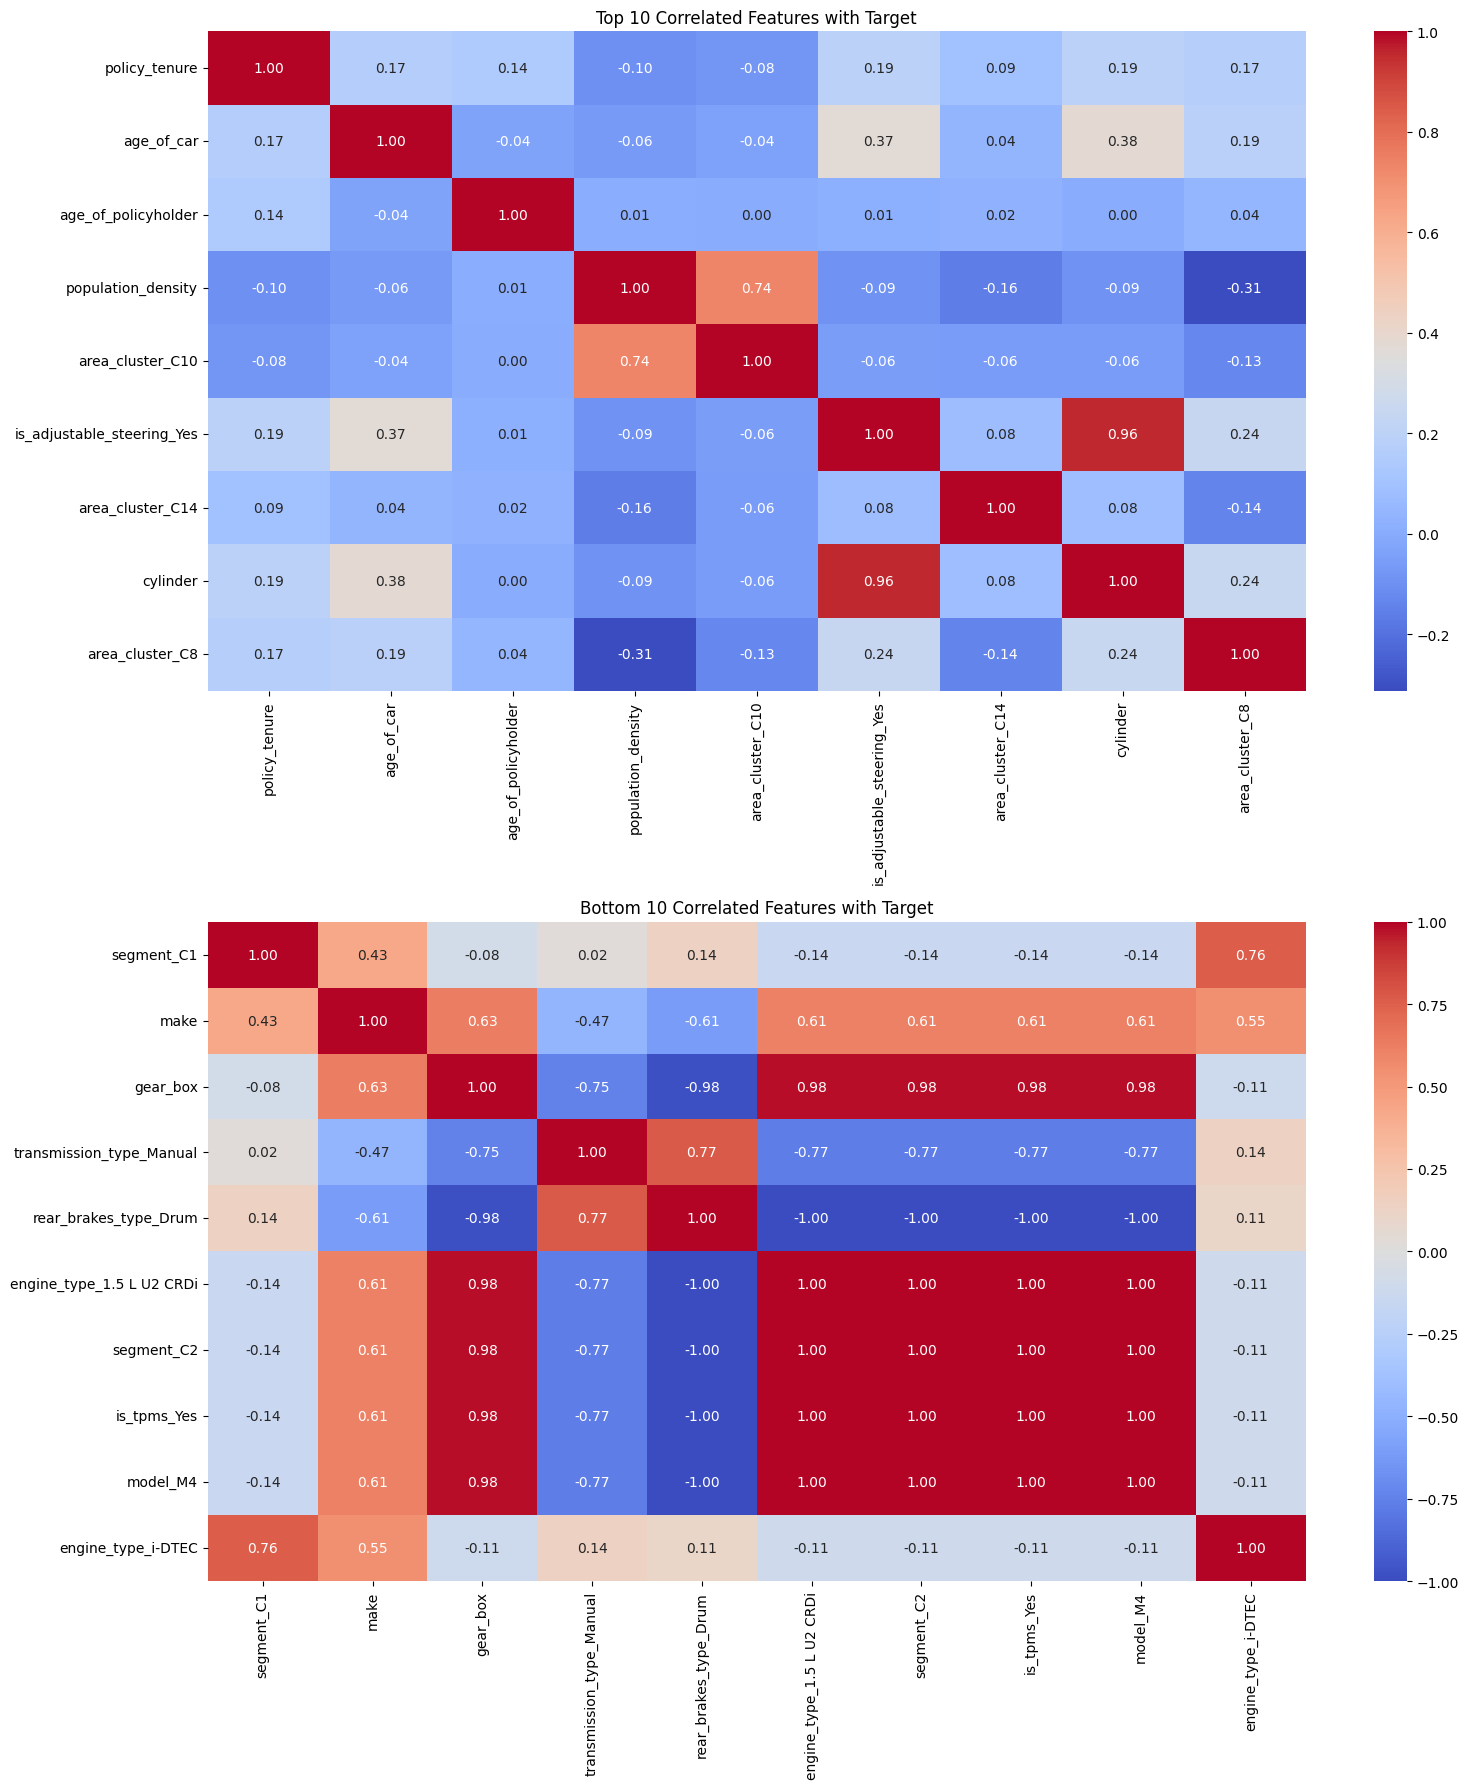

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named df and the target variable is 'target_column'
# Replace 'target_column' with the actual name of your target column

# Calculate correlations
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['is_claim']

# Top 10 correlated features
top_10_correlated = correlation_with_target.abs().sort_values(ascending=False).head(10)[1:]  # Exclude the target itself

# Bottom 10 correlated features
bottom_10_correlated = correlation_with_target.abs().sort_values(ascending=True).head(10)

# Select relevant columns from the dataframe
top_10_df = df[top_10_correlated.index]
bottom_10_df = df[bottom_10_correlated.index]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))

# Plot top 10 correlated features
sns.heatmap(top_10_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Top 10 Correlated Features with Target')

# Plot bottom 10 correlated features
sns.heatmap(bottom_10_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Bottom 10 Correlated Features with Target')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [24]:
data = correlation_with_target.abs().sort_values(ascending=True)
to_drop = []
for key, value in data.items():
    if value < 0.001:
        to_drop.append(key)

In [25]:
# looking at the above correlation plot we can drop certain features that are not correlated to our target variable i.e. values very close to 0, so we can drop 

In [26]:
y = df_final['is_claim']  # Target variable
X = df_final.drop(to_drop + ['is_claim'], axis=1)  # Features
#'gear_box', 'is_parking_camera', 'area_cluster_C16', 

In [27]:
from sklearn.preprocessing import StandardScaler
# # Apply StandardScaler to numerical columns
numerical_transformer = StandardScaler()
X = numerical_transformer.fit_transform(X)

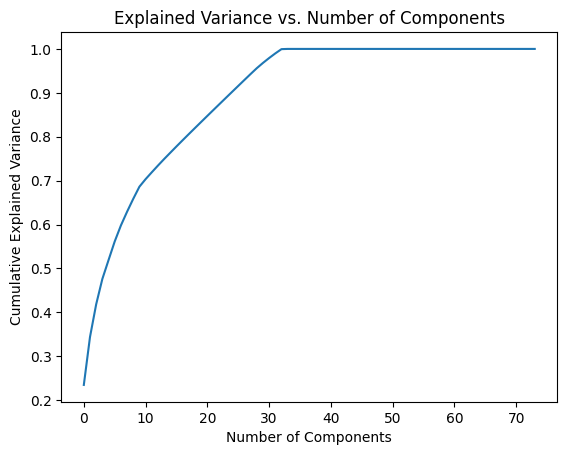

In [28]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=30)
# principalComponents = pca.fit_transform(X)
# finalX = pd.DataFrame(data = principalComponents)

pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [29]:
# Choose n_components based on your analysis
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected: {n_components}")
n_components = 70
print(X.shape)
# Use the selected number of components
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X)
finalX = pd.DataFrame(data=principalComponents)

Number of components selected: 29
(58592, 74)


#### Dealing with Data Imbalance using SMOTE and majority class Downsampling

In [30]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.utils import resample
from imblearn.combine import SMOTEENN 

def imbalanced_data(X_data, y_data, is_smote = 0):
    if is_smote == 0:
        
        minority_class, majority_class = y_data.value_counts().sort_values().values
        print('\033[1m' + "Before Over Sampling" + '\033[0m')
        print(f"\nShape of the data : {X_data.shape}\n\nValue Counts\n{y_data.value_counts()}")
        
        if (minority_class * 2) > majority_class:
            print("Data is Balanced")
        else:
            print(f"\nData is Imbalanced")
            print('\n\033[1m' + "After Over Sampling" + '\033[0m\n')
            X_data, y_data = SMOTE().fit_resample(X_data, y_data)
            print(f"Shape of the data : {X_data.shape}\n\nValue Counts\n{y_data.value_counts()}")  
            
    elif is_smote == 1:
        
        df1 = pd.concat([X_data, y_data], axis=1)

        majority_class = df1[df1['is_claim'] == 0]
        minority_class = df1[df1['is_claim'] == 1]

        undersampled_majority = resample(
            majority_class,
            replace=False,  # Set to False for undersampling
            n_samples=int(len(majority_class) * 0.2),  # Desired number of records in the majority class
            random_state=42  # Set a random seed for reproducibility
        )

        df_return = pd.concat([undersampled_majority, minority_class])
        
        X_data = df_return.drop('is_claim', axis=1)
        y_data = df_return['is_claim']
        
    else:
        minority_class, majority_class = y_data.value_counts().sort_values().values
        print('\033[1m' + "Before Over Sampling" + '\033[0m')
        print(f"\nShape of the data : {X_data.shape}\n\nValue Counts\n{y_data.value_counts()}")
        
        if (minority_class * 2) > majority_class:
            print("Data is Balanced")
        else:
            print(f"\nData is Imbalanced")
            print('\n\033[1m' + "After Over Sampling" + '\033[0m\n')
            # X_data, y_data = SMOTEENN(sampling_strategy = 0.7, random_state=42).fit_resample(X_data, y_data)
            X_data, y_data = SMOTE(sampling_strategy = 0.3).fit_resample(X_data, y_data)
            print(f"Shape of the data : {X_data.shape}\n\nValue Counts\n{y_data.value_counts()}")  
            
        df1 = pd.concat([X_data, y_data], axis=1)

        majority_class = df1[df1['is_claim'] == 0]
        minority_class = df1[df1['is_claim'] == 1]
        print('\n\033[1m' + "After Under Sampling" + '\033[0m\n')
        undersampled_majority = resample(
            majority_class,
            replace=False,  # Set to False for undersampling
            n_samples=int(len(majority_class) * 0.3),  # Desired number of records in the majority class
            random_state=42  # Set a random seed for reproducibility
        )
        df_return = pd.concat([undersampled_majority, minority_class])
        X_data = df_return.drop('is_claim', axis=1)
        y_data = df_return['is_claim']
        print(f"Shape of the data : {X_data.shape}\n\nValue Counts\n{y_data.value_counts()}")
    return X_data, y_data

#### Modelling and Experimentations

In [31]:
def XGBoost():
    #Using XG_Boost Classifier
    from xgboost import XGBClassifier
    xgbc=XGBClassifier()
    xgbc.fit(X_train, y_train)
    return xgbc
    
def RandomForest():
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    return clf

def gradient_boosting():
    from sklearn.ensemble import GradientBoostingClassifier
    clf_gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.06, max_depth=5, random_state=42)
    clf_gb.fit(X_train, y_train)
    return clf_gb

def logistic_regression():
    from sklearn.linear_model import LogisticRegression
    clf_lr = LogisticRegression(class_weight='balanced', random_state=42)
    clf_lr.fit(X_train, y_train)
    return clf_lr

def evaluate_model(xgbc): 
    # Making predictions
    threshold = 0.3
    y_train_pred = xgbc.predict(X_train)
    # y_test_pred  = xgbc.predict(X_test)
    y_test_pred = (xgbc.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    y_val_pred =  xgbc.predict(X_val)
    
    
    # Accuracy prediction
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    print('Training data accuracy score \n\n', train_acc)
    print('\n')
    print('Testing data accuracy score \n\n', test_acc)
    print('\n')
    print('Validation data accuracy score \n\n', val_acc)
    print('\n')
    
    print('Training data Classification Report \n\n',classification_report(y_train, y_train_pred))
    print('\n')
    print('Testing data Classification Report \n\n',classification_report(y_test, y_test_pred))
    print('\n')
    print('Validation data Classification Report \n\n',classification_report(y_val, y_val_pred))
    print('\n')
    
    print ("Training data Confusion Matrix : \n", confusion_matrix(y_train, y_train_pred))
    print('\n')
    print ("Testing data Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
    print('\n')
    print ("Validation data Confusion Matrix : \n", confusion_matrix(y_val, y_val_pred))
    print('\n')

    print("Class-Level accuracies on Training Set")
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    classwise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    class_labels = ['No Claim', 'Claim']
    
    for i, label in enumerate(class_labels):
        print(f"Accuracy for {label}: {classwise_accuracy[i]:.2%}")
        
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
        
    print("Class-Level accuracies on Testing Set")
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    classwise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    class_labels = ['No Claim', 'Claim']
    
    for i, label in enumerate(class_labels):
        print(f"Accuracy for {label}: {classwise_accuracy[i]:.2%}")
        
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Class-Level accuracies on Validation Set")
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    classwise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    class_labels = ['No Claim', 'Claim']
    
    for i, label in enumerate(class_labels):
        print(f"Accuracy for {label}: {classwise_accuracy[i]:.2%}")
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### Before Fixing the data Imbalance Issue

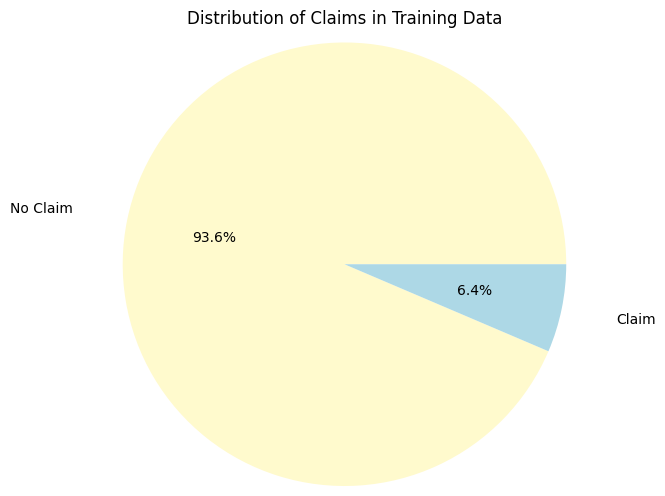

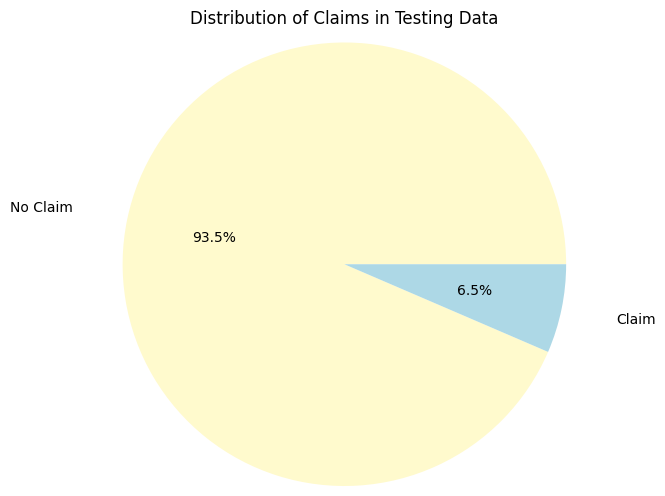

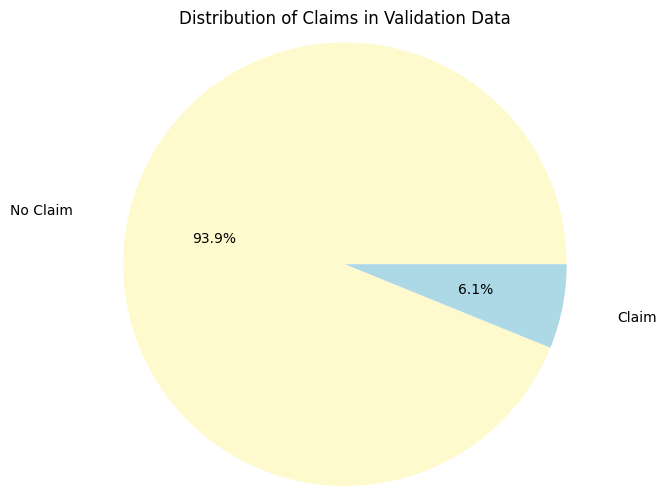

In [32]:
X_rem, X_test, y_rem, y_test = train_test_split(finalX, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.1, random_state=42)

plt.pie(y_train.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Training Data',pad=40)
plt.show()
plt.pie(y_test.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Testing Data',pad=40)
plt.show()
plt.pie(y_val.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Validation Data',pad=40)
plt.show()

Training data accuracy score 

 0.5685026760504025


Testing data accuracy score 

 0.10307167235494881


Validation data accuracy score 

 0.5633295411452408


Training data Classification Report 

               precision    recall  f1-score   support

           0       0.95      0.57      0.71     44413
           1       0.09      0.60      0.15      3045

    accuracy                           0.57     47458
   macro avg       0.52      0.58      0.43     47458
weighted avg       0.90      0.57      0.67     47458



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.97      0.04      0.08      5481
           1       0.07      0.98      0.12       379

    accuracy                           0.10      5860
   macro avg       0.52      0.51      0.10      5860
weighted avg       0.91      0.10      0.08      5860



Validation data Classification Report 

               precision    recall  f1-score   support

        

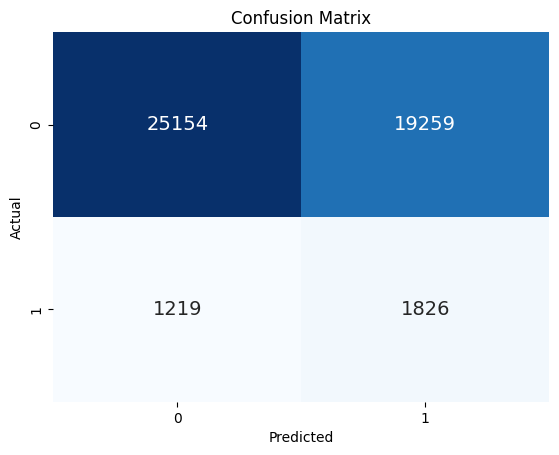

Class-Level accuracies on Testing Set
Accuracy for No Claim: 4.23%
Accuracy for Claim: 98.15%


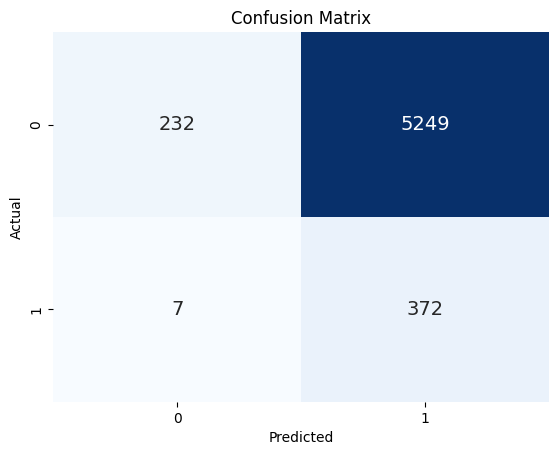

Class-Level accuracies on Validation Set
Accuracy for No Claim: 55.96%
Accuracy for Claim: 62.04%


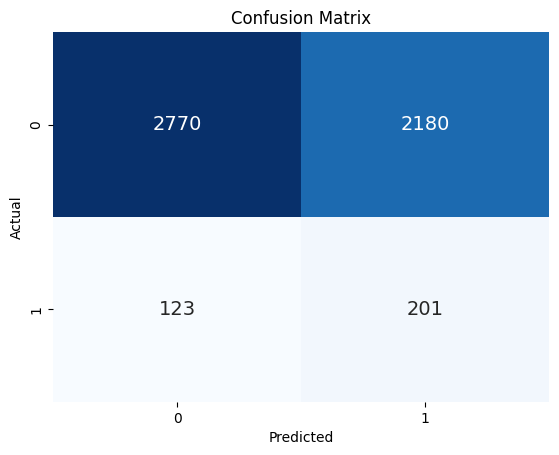

In [33]:
model = logistic_regression()
evaluate_model(model)

Training data accuracy score 

 0.999873572421931


Testing data accuracy score 

 0.9071672354948805


Validation data accuracy score 

 0.9336367083807356


Training data Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44413
           1       1.00      1.00      1.00      3045

    accuracy                           1.00     47458
   macro avg       1.00      1.00      1.00     47458
weighted avg       1.00      1.00      1.00     47458



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      5481
           1       0.06      0.03      0.04       379

    accuracy                           0.91      5860
   macro avg       0.50      0.50      0.50      5860
weighted avg       0.88      0.91      0.89      5860



Validation data Classification Report 

               precision    recall  f1-score   support

          

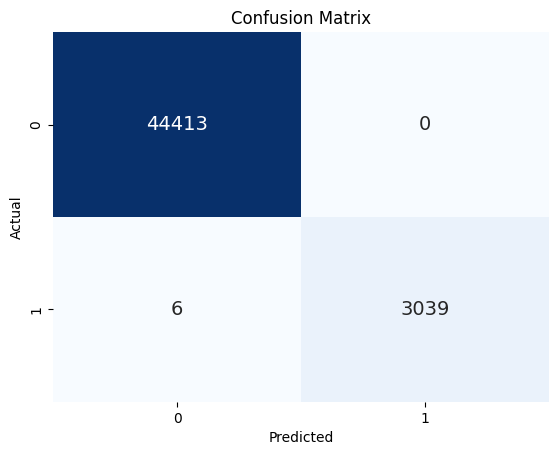

Class-Level accuracies on Testing Set
Accuracy for No Claim: 96.77%
Accuracy for Claim: 3.17%


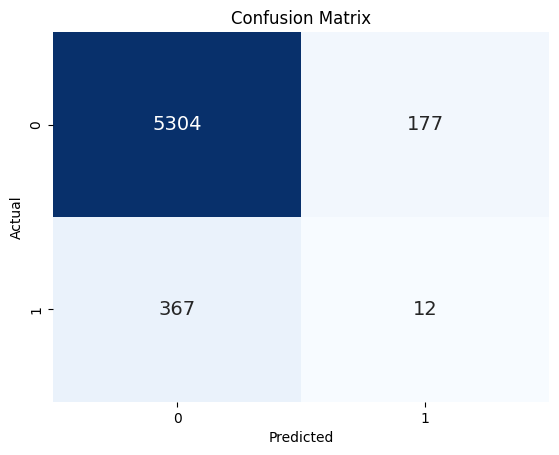

Class-Level accuracies on Validation Set
Accuracy for No Claim: 99.45%
Accuracy for Claim: 0.31%


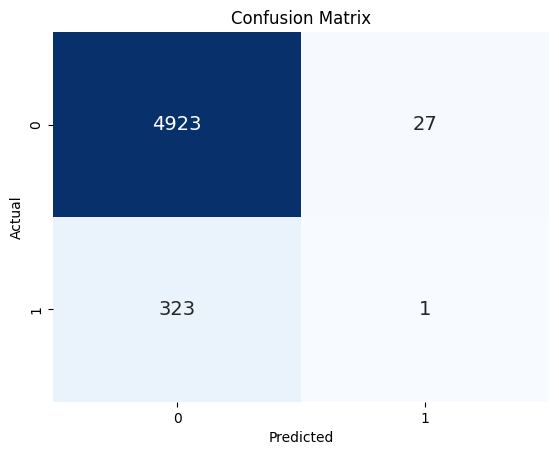

In [34]:
model = RandomForest()
evaluate_model(model)

Training data accuracy score 

 0.9625563656285557


Testing data accuracy score 

 0.928839590443686


Validation data accuracy score 

 0.9383769434963974


Training data Classification Report 

               precision    recall  f1-score   support

           0       0.96      1.00      0.98     44413
           1       1.00      0.42      0.59      3045

    accuracy                           0.96     47458
   macro avg       0.98      0.71      0.78     47458
weighted avg       0.96      0.96      0.96     47458



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.94      0.99      0.96      5481
           1       0.03      0.00      0.00       379

    accuracy                           0.93      5860
   macro avg       0.48      0.50      0.48      5860
weighted avg       0.88      0.93      0.90      5860



Validation data Classification Report 

               precision    recall  f1-score   support

          

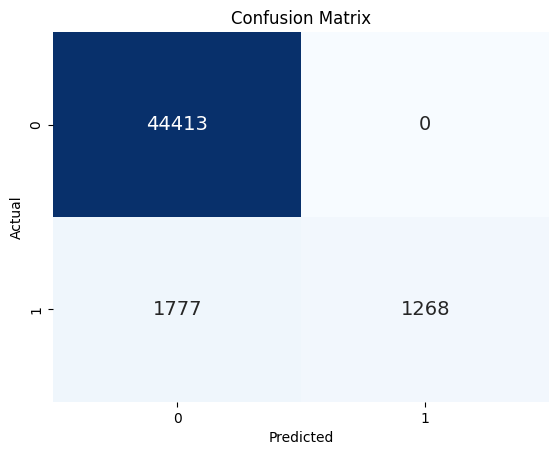

Class-Level accuracies on Testing Set
Accuracy for No Claim: 99.29%
Accuracy for Claim: 0.26%


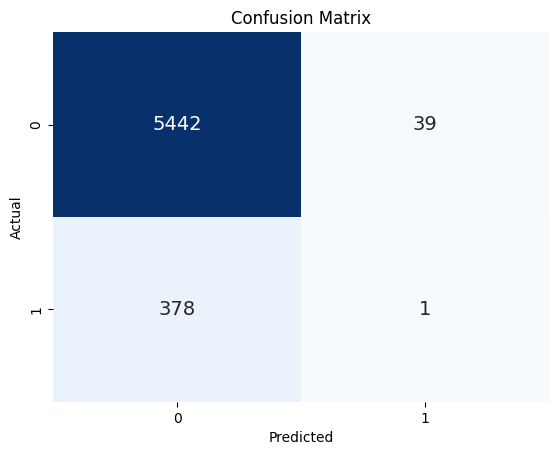

Class-Level accuracies on Validation Set
Accuracy for No Claim: 99.98%
Accuracy for Claim: 0.00%


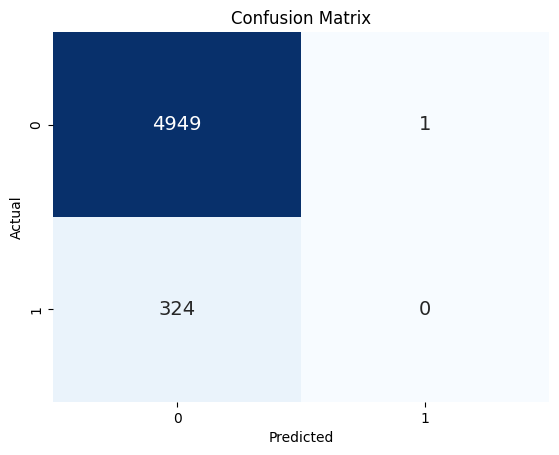

In [35]:
model = XGBoost()
evaluate_model(model)

#### After fixing the data Imbalance Issue

In [36]:
imb_X, imb_y = imbalanced_data(finalX, y, is_smote = 0)
X_rem, X_test, y_rem, y_test = train_test_split(imb_X, imb_y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.1, random_state=42)

Before Over Sampling

Shape of the data : (58592, 70)

Value Counts
is_claim
0    54844
1     3748
Name: count, dtype: int64

Data is Imbalanced

After Over Sampling

Shape of the data : (109688, 70)

Value Counts
is_claim
0    54844
1    54844
Name: count, dtype: int64


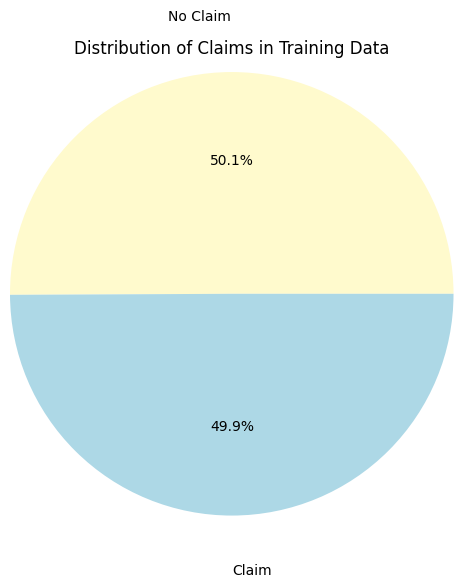

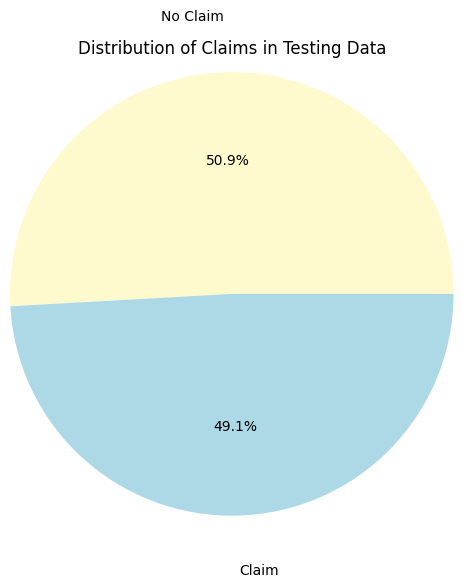

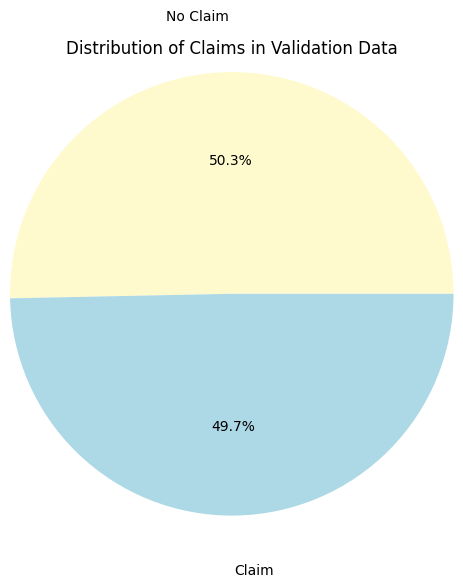

In [37]:
plt.pie(y_train.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Training Data',pad=40)
plt.show()
plt.pie(y_test.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Testing Data',pad=40)
plt.show()
plt.pie(y_val.value_counts(),labels=['No Claim','Claim'],radius=1.5,colors = ['#FFFACD','#ADD8E6'],
        autopct='%1.1f%%',labeldistance=1.25,startangle =0)
plt.title('Distribution of Claims in Validation Data',pad=40)
plt.show()

Training data accuracy score 

 0.9197159161254741


Testing data accuracy score 

 0.8112863524478074


Validation data accuracy score 

 0.865984602917342


Training data Classification Report 

               precision    recall  f1-score   support

           0       0.95      0.88      0.92     44358
           1       0.89      0.96      0.92     44489

    accuracy                           0.92     88847
   macro avg       0.92      0.92      0.92     88847
weighted avg       0.92      0.92      0.92     88847



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.97      0.65      0.78      5582
           1       0.73      0.98      0.84      5387

    accuracy                           0.81     10969
   macro avg       0.85      0.81      0.81     10969
weighted avg       0.85      0.81      0.81     10969



Validation data Classification Report 

               precision    recall  f1-score   support

          

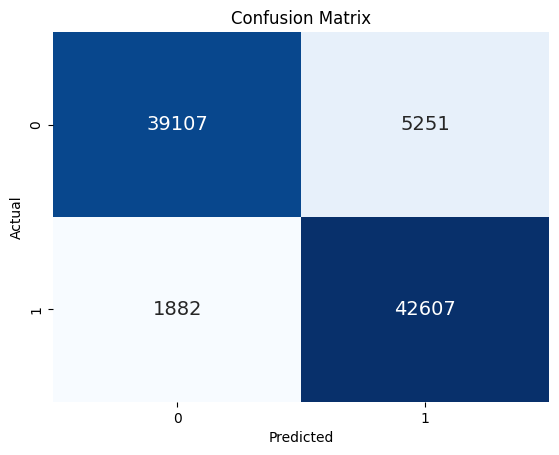

Class-Level accuracies on Testing Set
Accuracy for No Claim: 64.71%
Accuracy for Claim: 98.14%


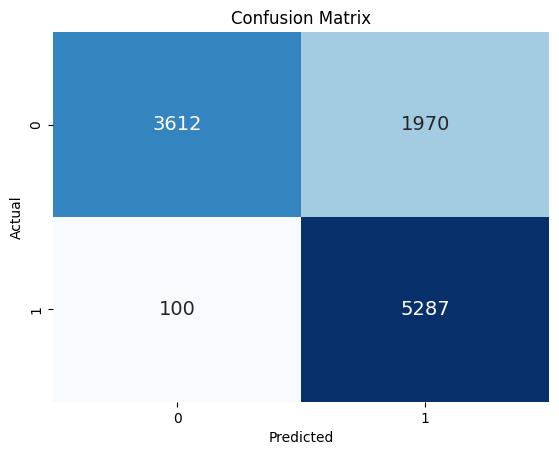

Class-Level accuracies on Validation Set
Accuracy for No Claim: 81.26%
Accuracy for Claim: 91.87%


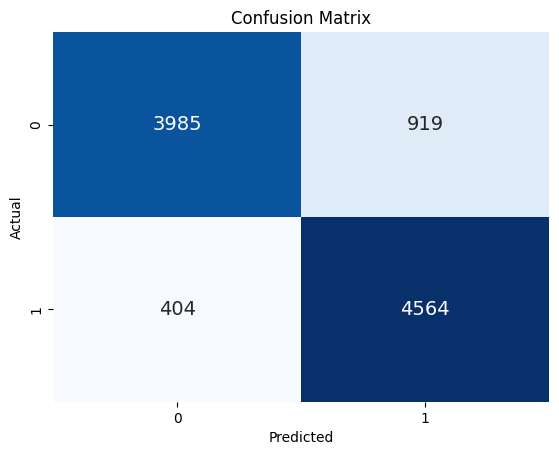

In [38]:
model = XGBoost()
evaluate_model(model)

Training data accuracy score 

 0.9999774893918759


Testing data accuracy score 

 0.8369951682012946


Validation data accuracy score 

 0.8773298217179902


Training data Classification Report 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44358
           1       1.00      1.00      1.00     44489

    accuracy                           1.00     88847
   macro avg       1.00      1.00      1.00     88847
weighted avg       1.00      1.00      1.00     88847



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.97      0.70      0.81      5582
           1       0.76      0.97      0.85      5387

    accuracy                           0.84     10969
   macro avg       0.86      0.84      0.83     10969
weighted avg       0.87      0.84      0.83     10969



Validation data Classification Report 

               precision    recall  f1-score   support

         

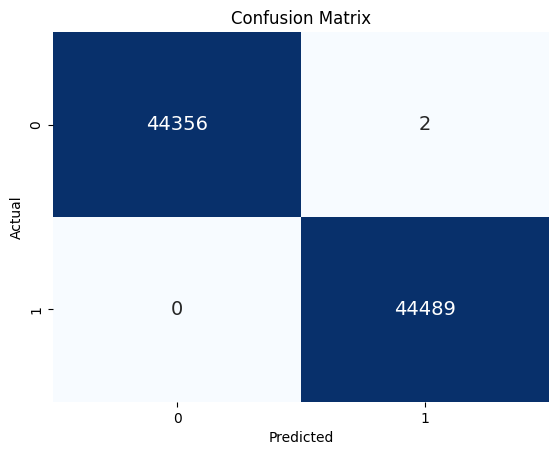

Class-Level accuracies on Testing Set
Accuracy for No Claim: 70.44%
Accuracy for Claim: 97.44%


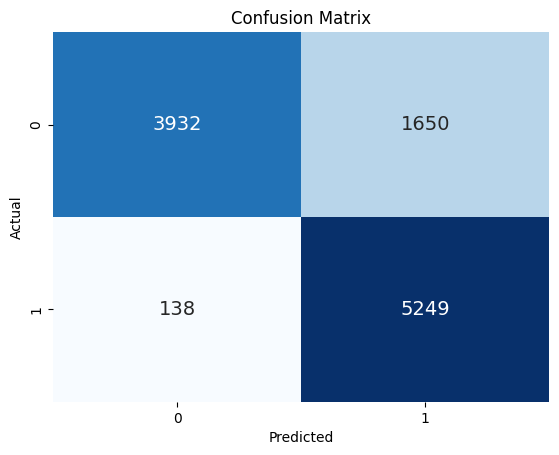

Class-Level accuracies on Validation Set
Accuracy for No Claim: 84.16%
Accuracy for Claim: 91.26%


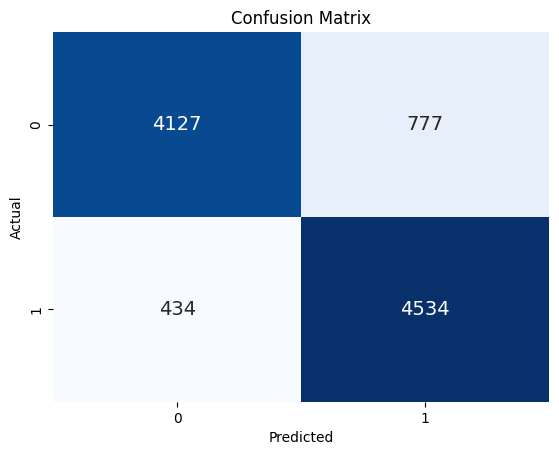

In [39]:
model = RandomForest()
evaluate_model(model)

Training data accuracy score 

 0.5869078303150359


Testing data accuracy score 

 0.5187346157352539


Validation data accuracy score 

 0.5834683954619124


Training data Classification Report 

               precision    recall  f1-score   support

           0       0.59      0.57      0.58     44358
           1       0.58      0.60      0.59     44489

    accuracy                           0.59     88847
   macro avg       0.59      0.59      0.59     88847
weighted avg       0.59      0.59      0.59     88847



Testing data Classification Report 

               precision    recall  f1-score   support

           0       0.84      0.07      0.12      5582
           1       0.51      0.99      0.67      5387

    accuracy                           0.52     10969
   macro avg       0.67      0.53      0.40     10969
weighted avg       0.68      0.52      0.39     10969



Validation data Classification Report 

               precision    recall  f1-score   support

         

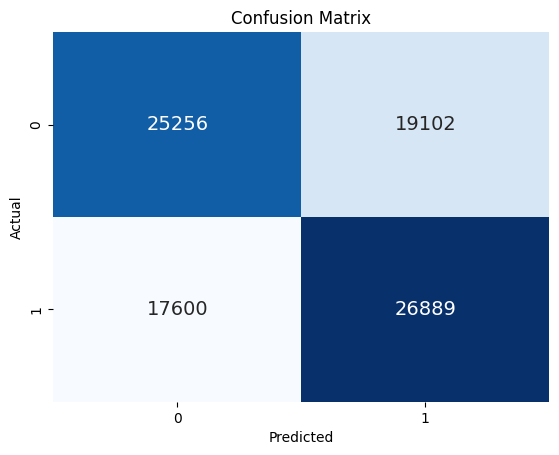

Class-Level accuracies on Testing Set
Accuracy for No Claim: 6.66%
Accuracy for Claim: 98.72%


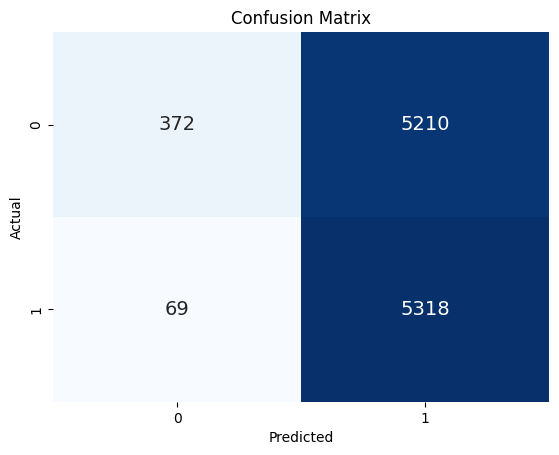

Class-Level accuracies on Validation Set
Accuracy for No Claim: 56.40%
Accuracy for Claim: 60.27%


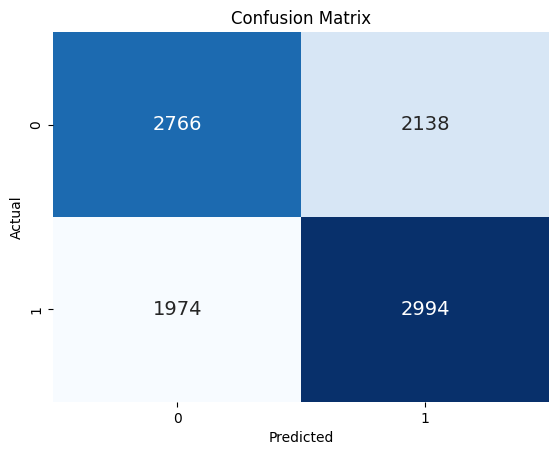

In [40]:
model = logistic_regression()
evaluate_model(model)